# Pre-processing external dataset for project 2: Crime Harashment

LGA data tables harm caused Visualization: (Data_Tables_LGA_Harm_Caused_Visualisation_Year_Ending_December_2021)


The Harm caused by crime measure reorganises the person based victim reports by principal offence type into an alternate view that is categorised by a high, medium of low harm...


Recorded crime statistics are based on data extracted by Victoria police on the 18th day after the reference period, and are subject to movement between releases. For more information about how statistics are compiled, refer to the Explanatory notes on the CSA website.	

Source: https://discover.data.vic.gov.au/dataset/crime-statistics-agency-data-tables-harm-caused

In [23]:
#Initialization packages
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the external dataset

In [2]:
#Direction to working directory
os.chdir('/Users/axbmac/Desktop/Applied Data Science/Project 2/External data')
print("Current working directory: {0}".format(os.getcwd())) 

Current working directory: /Users/axbmac/Desktop/Applied Data Science/Project 2/External Data


In [3]:
crime=pd.read_excel('Offence_by_LGA.xls')

#crime.describe()
crime.tail()

,Year,Year ending,Local Government Area,Offence Group,Harm Caused Flag,Victim Reports,Yr % FV of Total
15180,2012,December,Yarriambiack,A73 Threatening behaviour,Medium Harm,6,33.3
15181,2012,December,Yarriambiack,B21 Criminal damage,Low Harm,24,8.3
15182,2012,December,Yarriambiack,B32 Non-aggravated burglary,Low Harm,13,NaN
15183,2012,December,Yarriambiack,B42 Steal from a motor vehicle,Low Harm,8,NaN
15184,2012,December,Yarriambiack,B49 Other theft,Low Harm,31,3.2


In [4]:
#Dropping non-announced values
crime.dropna(axis=0)

,Year,Year ending,Local Government Area,Offence Group,Harm Caused Flag,Victim Reports,Yr % FV of Total
0,2021,December,Alpine,A21 Serious assault,High Harm,22,54.5
1,2021,December,Alpine,A23 Common assault,Medium Harm,31,61.3
2,2021,December,Alpine,A31 Rape,High Harm,9,66.7
3,2021,December,Alpine,A32 Indecent assault,High Harm,10,40.0
4,2021,December,Alpine,A89 Other dangerous or negligent acts endanger...,Low Harm,5,40.0
...,...,...,...,...,...,...,...
15178,2012,December,Yarriambiack,A23 Common assault,Medium Harm,24,62.5
15179,2012,December,Yarriambiack,A32 Indecent assault,High Harm,5,20.0
15180,2012,December,Yarriambiack,A73 Threatening behaviour,Medium Harm,6,33.3
15181,2012,December,Yarriambiack,B21 Criminal damage,Low Harm,24,8.3


In [5]:
#We have NaN values in the last column "Yr % FV of Total"!
crime.isnull().any()

Year                     False
Year ending              False
Local Government Area    False
Offence Group            False
Harm Caused Flag         False
Victim Reports           False
Yr % FV of Total          True
dtype: bool

In [6]:
#Removing Year ending due to irrelevance
crime.drop("Year ending",axis=1,inplace=True)


In [7]:
crime

,Year,Local Government Area,Offence Group,Harm Caused Flag,Victim Reports,Yr % FV of Total
0,2021,Alpine,A21 Serious assault,High Harm,22,54.5
1,2021,Alpine,A23 Common assault,Medium Harm,31,61.3
2,2021,Alpine,A31 Rape,High Harm,9,66.7
3,2021,Alpine,A32 Indecent assault,High Harm,10,40.0
4,2021,Alpine,A89 Other dangerous or negligent acts endanger...,Low Harm,5,40.0
...,...,...,...,...,...,...
15180,2012,Yarriambiack,A73 Threatening behaviour,Medium Harm,6,33.3
15181,2012,Yarriambiack,B21 Criminal damage,Low Harm,24,8.3
15182,2012,Yarriambiack,B32 Non-aggravated burglary,Low Harm,13,NaN
15183,2012,Yarriambiack,B42 Steal from a motor vehicle,Low Harm,8,NaN


In [8]:
# Total Victim reports pr. LGA 
crime.groupby("Local Government Area").sum().agg("Victim Reports")

Local Government Area
Alpine           1641
Ararat           4736
Ballarat        50318
Banyule         38353
Bass Coast      11711
                ...  
Wodonga         13791
Wyndham         65910
Yarra           62128
Yarra Ranges    31075
Yarriambiack     1713
Name: Victim Reports, Length: 79, dtype: int64

In [9]:

# Total Victim reports pr. year 
crime.groupby("Year").agg("Victim Reports").sum()

Year
2012    204502
2013    199634
2014    203107
2015    215767
2016    244730
2017    216874
2018    216468
2019    228186
2020    205574
2021    198239
Name: Victim Reports, dtype: int64

In [12]:
#The average Victim Reports pr. Year
crime.groupby("Year").agg("Victim Reports").mean()

Year
2012    143.409537
2013    137.583735
2014    139.592440
2015    147.886909
2016    162.395488
2017    140.735886
2018    137.877707
2019    142.616250
2020    129.373191
2021    124.914304
Name: Victim Reports, dtype: float64

In [66]:
# Sum of Victim Reports by Local Government Areas
crime.groupby("Local Government Area").agg("Victim Reports").sum()


Local Government Area
Alpine           1641
Ararat           4736
Ballarat        50318
Banyule         38353
Bass Coast      11711
                ...  
Wodonga         13791
Wyndham         65910
Yarra           62128
Yarra Ranges    31075
Yarriambiack     1713
Name: Victim Reports, Length: 79, dtype: int64

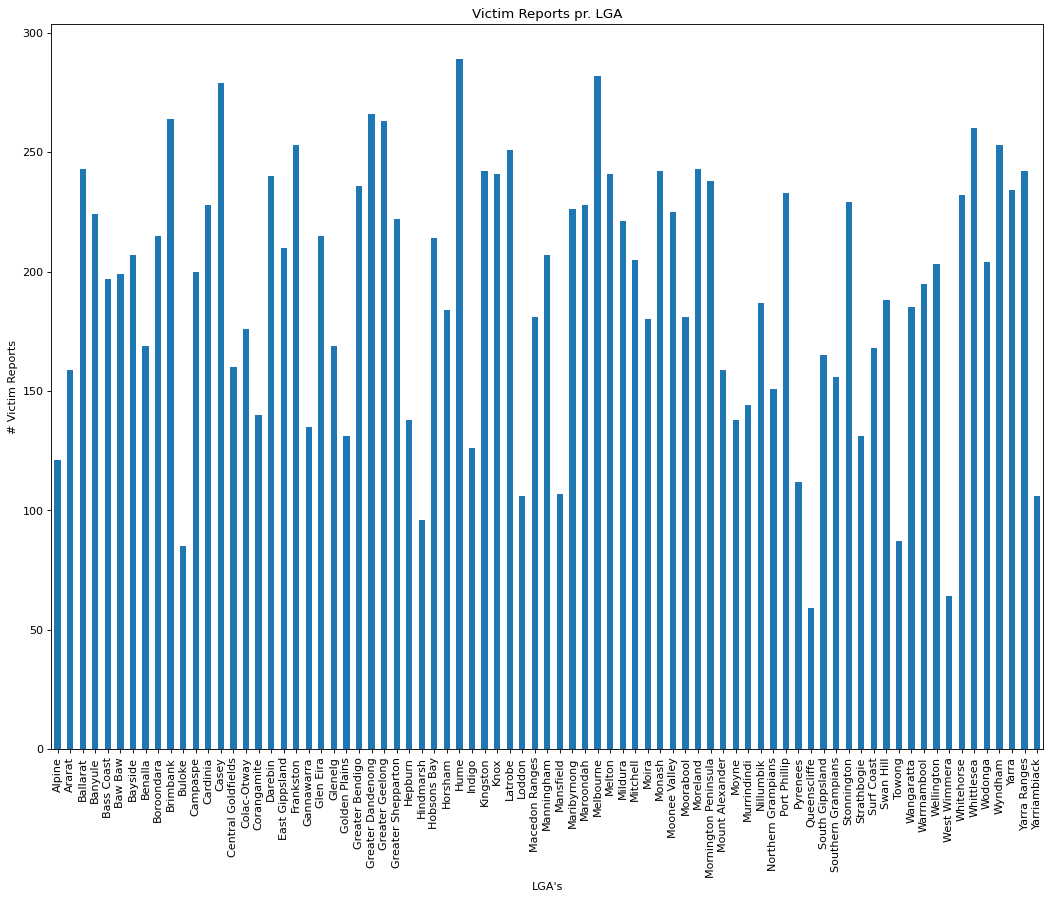

In [71]:
#Plot of Victim Reports pr. LGA
from matplotlib.pyplot import figure

plt.figure(figsize=(16, 12), dpi=80)
crime.groupby('Local Government Area')['Victim Reports'].count().plot(kind='bar')

plt.title("Victim Reports pr. LGA")
plt.xlabel("LGA's")
plt.ylabel("# Victim Reports")
plt.show()

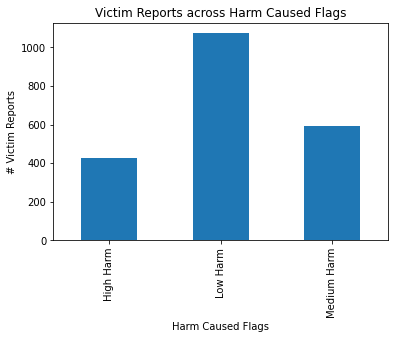

In [62]:
#Plot of Victim Reports across Harm Caused Flags 
crime.groupby('Harm Caused Flag')['Victim Reports'].nunique().plot(kind='bar')

plt.title("Victim Reports across Harm Caused Flags")
plt.xlabel("Harm Caused Flags")
plt.ylabel("# Victim Reports")

plt.show()

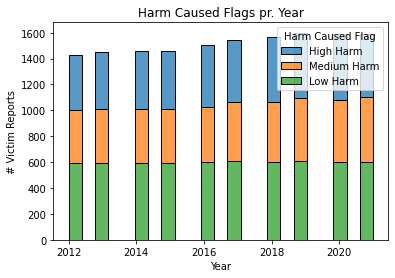

In [61]:
#Plot of Harm Caused Flag pr. Year
fig=sns.histplot(data=crime, x="Year", hue="Harm Caused Flag", multiple="stack").set(title="Harm Caused Flags pr. Year")
plt.xlabel("Year")
plt.ylabel("# Victim Reports")

plt.show(fig)
